# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


The dataset used for this analysis is originally from Kaggle. It contains approximately 100 thousand observations of the medical appointment of patients in Brazil. The observations are used to examine whether a patient that was scheduled for an appointment actually turns up for the appointment or not. There are several characteristics of patient that are collected in order to understand what category of patients show up for their medical appointments. There are 14 variables in the dataset.


 >  <li> PatientId: A unique number for identifying a patient
 >  <li> AppointmentID: A number generated for the appointment of the patient
 >  <li> Gender: Whether the patient is a male or female
 >  <li> ScheduleDay: The date the appointiment was given
 >  <li> AppointmentDay: The actual day of the appointiment
 >  <li> Age: The age of the patience
 >  <li> Neighbourhood: The location of the medical centre
 >  <li> Scholarship: Whether the patient is on the Brazilian welfare program or not.
 >  <li> Hipertenton: If the patient is hypertensive or not
 >  <li> Diabetes: Whether the patient is diabetic or not
 >  <li> Alcoholism: Whether the patient is an alcoholic addict or not 
 >  <li> Handcap: If the patient is physically challenged or not
 >  <li> SMS_received: Whether the patient received sms notification for the appointment or not
 >  <li> No-show: No-if the patient show up and Yes-if the patient did not turn up for the appointment
       
       
The are thirteen independent variables in the dataset and only one dependent variable (No-show). The no-show variable is the target vector which we want to explore how other variables in the dataset can help us to predict.
   
   
### Question(s) for Analysis

The following questions will be addressed during the data analysis.

> <li> Which factor is the most predominant factor in predicting whether a patient will show up for his/her medical appointment or not?
> <li> What role does the age and gender of patients play in their show-up or no-show for medical appointments?
> <li> Does the health condition of patients affects their show-up rate for medical appointments?
> <li> Does the drinking habit of patients influence whether they will show up or not for their medical appointments?
> <li> Is receiving sms notification of appointment useful in predicting the no-show of the patient?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The packages needed for data analysis are first loaded here

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The dataset is loaded and the first five observation is viewed using the head() function.

In [3]:
# Load your data and print out a few lines
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The shape of the dataset is printed to check the number of observations and the total number of the columns. There are 110,527 observation with 14 columns in the dataset.

In [4]:
# check the shape of the dataframe
df.shape

(110527, 14)

The .info() function is called on the dataframe to verify the data type of each columns and to check the number of observation of each column, to quickly scan for any missing values in each column of the dataframe

In [5]:
# Check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information above, it can be observed that there is no missing value in the dataframe since each column contains the total number of observation (110,527). The data type of each column can also be observed. Some columns appear to be in a wrong data type. This will be addressed at the data cleaning stage.

In [6]:
# confirm number of null values in the dataframe
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# check the descriptive statistics of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the summary statistics above, we can see the mean, median, standard deviation, minimum and maximum values in each column of the dataframe. As we can observed, the minimum value in the age column is -1. This is unusual as there is no negative age of a person. We need to investigate further how many of such unexpected values are available in the dataset and we will clean the data accordingly.

In [8]:
# check to see if there is any duplicate values
df.duplicated().sum()

0

There is no duplicate data in the dataframe.

In [9]:
# check number of unique values in each column of the dataframe
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can observe, from the number of unique values above, that there are 62,299 unique patients in the dataset with total of 110,527. The Gender, Scholarship, Hipertention, Diabetes, Alcholism, SMS_received, and No-show columns all have two unique values. Also, there are 81 location of hospitals in the Neighbourhood column. We will delve deeper into the dataset during the cleaning and the exploratory data analysis stage. 


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

First, the column names of the dataset are changed from uppercase label to lowercase label for easy handling of data and an underscore "_" is used within words for easy readability.

In [10]:
# replace uppercase labels with lowercase labels for the dataset
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
# rename columns and use underscore between words for easy readability
df.rename(
    columns={"patientid": "patient_id",
             "appointmentid": "appointment_id",
             "scheduledday": "scheduled_day", 
             "appointmentday": "appointment_day" 
            }, 
    inplace=True)

df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# check dataframe info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data types of the dataframe needs some fixing. The patient_id and the appointment_id are unique code of each patients which suppose to be in string. The patient_id is a flaot while the appointment_id is an integer. We convert the two columns to strings. Also, the scheduled_day and appointment_day contain dates and time but they are both in string data type. We will convert both to datetime data types so that date analysis can be performed on them.

In [13]:
# change the data type of patient_id and appointment_id to string
columns = ["patient_id", "appointment_id"]

for c in columns:
    df[c] = df[c].astype(str)

In [14]:
# check data type
df.dtypes

patient_id         object
appointment_id     object
gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no_show            object
dtype: object

In [15]:
# change the data type of scheduled_day and appointment_day to datetime
date_data = ["scheduled_day", "appointment_day"]

for c in date_data:
    df[c] = pd.to_datetime(df[c])
    
# check head()
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
# check data type
df.dtypes

patient_id                      object
appointment_id                  object
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hipertension                     int64
diabetes                         int64
alcoholism                       int64
handcap                          int64
sms_received                     int64
no_show                         object
dtype: object

In [17]:
# check number of unique values in patient_id and appointment_id 
columns = ["patient_id", "appointment_id"]

for c in columns:
    print(df[c].nunique())

62299
110527


The patient_id and appointment_id columns contains unique identification number of each patients and will not be useful for predicting whether a patient will show up or not.  

In [18]:
# drop columns which will not be helpfull in answering the problem questions
df.drop(['patient_id', 'appointment_id'], axis = 1, inplace = True)
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [19]:
# check the shape of the dataframe to confirm that the two columns has been dropped
df.shape

(110527, 12)

Check the value counts in each column to verify the type of satistical operations that can be carried out on each. 

In [20]:
# check value count of no_show column
df["no_show"].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

Out of the 110,527 medical appointment, 88,208 patient show up for their appointments while 22,319 defaulted.

In [21]:
# check value count of neighbourhood column
print(df["neighbourhood"].value_counts().head())
print(df["neighbourhood"].value_counts().tail())

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: neighbourhood, dtype: int64
ILHA DO BOI                    35
ILHA DO FRADE                  10
AEROPORTO                       8
ILHAS OCEÂNICAS DE TRINDADE     2
PARQUE INDUSTRIAL               1
Name: neighbourhood, dtype: int64


From the 81 unique neighbourhood, Jardim Camburi has the larget medical appointment while Parque Industrial has the least medical appointment for patients.

In [22]:
# check value count of scholarship column
df["scholarship"].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

Only 1,0861 of the 110,527 patients are on the Brazilian Government welfare program.

In [23]:
# check value count of gender column
df["gender"].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

There are more female medical appointments than male.  

In [24]:
# check value count of hipertension column
df["hipertension"].value_counts()

0    88726
1    21801
Name: hipertension, dtype: int64

In [25]:
# check value count of diabetes column
df["diabetes"].value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

In [26]:
# check value count of alcoholism column
df["alcoholism"].value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

In [27]:
# check value count of sms_received column
df["sms_received"].value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

In [28]:
# check value count of handcap column
df["handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

From the value of each columns above, it can be observed that the scholarship, hipertention, diabetes, alcoholism, hadicap and columns contain categorical data which can better be analysis by changing the data type of those columns from integer to strings.

In [29]:
# change the data types of categorical data from "int" to "str" for easy analysis
cat_columns = ["scholarship", "hipertension", "diabetes", "alcoholism", "handcap", "sms_received"]

for c in cat_columns:
    df[c] = df[c].astype(str)

In [30]:
# check data type
df.dtypes

gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                     object
hipertension                    object
diabetes                        object
alcoholism                      object
handcap                         object
sms_received                    object
no_show                         object
dtype: object

The summary statistics which was performed above reveals that the minimum value of the age column is "-1" which is unlike since there cannot be a negative age of a person. We check for the unique values in the age column to see the numbers of nagative values in the dataset.

In [31]:
# check unique values in age and sort in ascending order
np.sort(df["age"].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

There is only one occurence of the negative value in the age column. It will be better to drop this from the dataframe

In [32]:
# remove negative age value from the dataset
df = df[df["age"] > -1]
df.shape

(110526, 12)

In [33]:
# check unique values in age to confirm that -1 is removed
np.sort(df["age"].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### What is the correlation between variables?

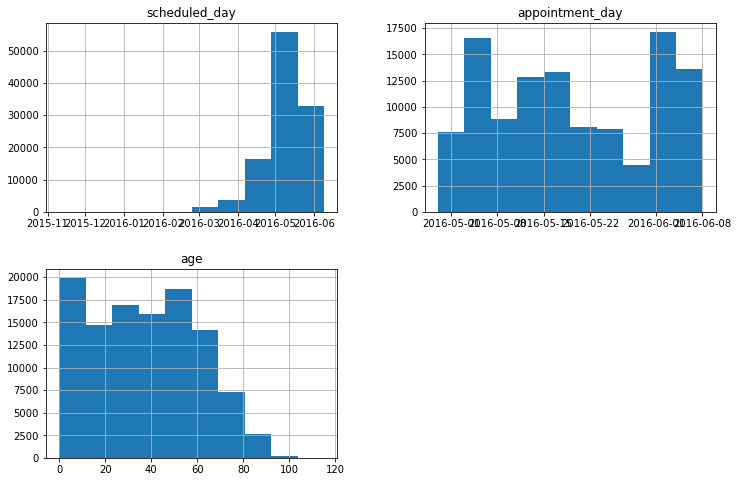

In [34]:
# Check the distribution of the numerical dataframes
df.hist(figsize=(12, 8));

### What role does the age and gender of patients play in their show-up or no-show for medical appointments?

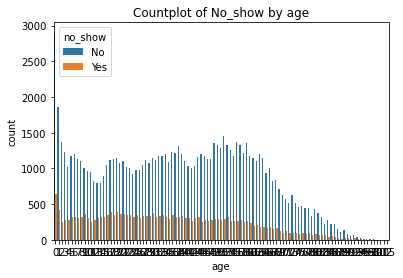

In [38]:
# Plot countplot for age

fig = sns.countplot(x=df["age"], hue=df["no_show"], data=df);
fig.set_title("Countplot of No_show by age");

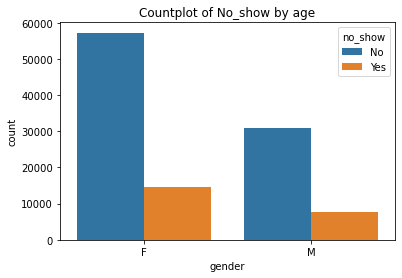

In [39]:
# Plot countplot for gender

fig = sns.countplot(x=df["gender"], hue=df["no_show"], data=df);
fig.set_title("Countplot of No_show by age");

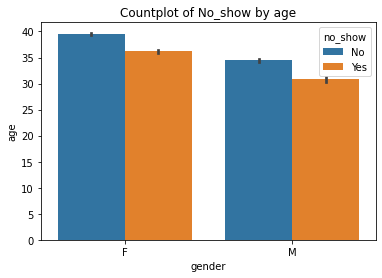

In [41]:
# Plot barplot for age and gender

fig = sns.barplot(x=df["gender"], y=df["age"], hue=df["no_show"], data=df);
fig.set_title("Countplot of No_show by age");

### Does the health condition of patients affects their show-up rate for medical appointments?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])